In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap = plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

## Normalize Data

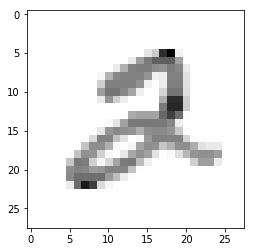

In [3]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

plt.imshow(x_train[5], cmap = plt.cm.binary)
plt.show()

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 55s 915us/sample - loss: 0.2577 - acc: 0.9240
Epoch 2/3
60000/60000 [==============================] - 29s 483us/sample - loss: 0.1058 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 29s 475us/sample - loss: 0.0732 - acc: 0.9774 - loss:


In [5]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 503us/sample - loss: 0.0858 - acc: 0.9722


In [6]:
print(val_loss, val_accuracy)

0.08577470830231905 0.9722


In [7]:
model.save('mnist_num_reader.model')

In [8]:
new_model = tf.keras.models.load_model('mnist_num_reader.model')

In [9]:
predictions = new_model.predict(x_test)

In [10]:
predictions

array([[1.7454118e-08, 6.6646959e-07, 1.6985592e-04, ..., 9.9980086e-01,
        6.4635390e-07, 1.8008567e-06],
       [9.5865903e-07, 3.1981661e-05, 9.9992049e-01, ..., 6.2703873e-09,
        3.7762540e-05, 8.9567923e-11],
       [1.8223862e-08, 9.9909604e-01, 1.8189501e-04, ..., 1.0305433e-04,
        3.2298057e-04, 2.4552267e-07],
       ...,
       [2.5668548e-10, 4.1163435e-07, 2.6629360e-08, ..., 6.7856097e-05,
        8.1830636e-05, 3.0729923e-05],
       [1.0852465e-06, 4.9136668e-07, 2.1760412e-07, ..., 2.3341396e-07,
        3.2909915e-03, 8.5562724e-06],
       [1.9523164e-07, 1.1453758e-08, 7.1473501e-08, ..., 5.3232568e-11,
        1.3544557e-07, 8.7251344e-09]], dtype=float32)

In [11]:
import numpy as np
np.argmax(predictions[0])

7

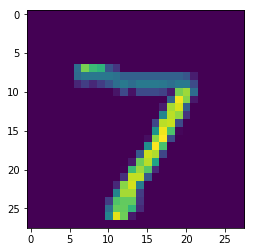

In [12]:
plt.imshow(x_test[0])